In [ ]:
from scipy.linalg import toeplitz
from models import ModelLinReg
from gradient_descent import GradientDescent
import numpy as np
from utils import inspector
import matplotlib.pyplot as plt
from sgd import SGD

In [ ]:
n_samples = 1000	
n_features = 50
corr, std = 0.6, 0.5
n_iter = 50
strength = 1e-3
w0 = np.zeros(n_features)
n_samples = 500

nnz = 20
idx = np.arange(n_features)
w_true = (-1) ** idx * np.exp(-idx / 10.)
w_true[nnz:] = 0.

print("Creating model...")
model = ModelLinReg(n_samples=n_samples, corr=corr, std=std, strength=strength, w0=w_true)
print("Simulating data...")
X, y = model.simu_linreg()

gradient_descent = GradientDescent(w0=w0, n_iter=n_iter, model=model, verbose=True)
callback_gd = inspector(model, n_iter=n_iter)
w_gd = gradient_descent.gd(callback=callback_gd)

callback_agd = inspector(model, n_iter=n_iter)
w_agd = gradient_descent.agd(callback=callback_agd)

callback_hb = inspector(model, n_iter=n_iter)
w_hb = gradient_descent.hb(callback=callback_hb)

callback_cgd = inspector(model, n_iter=n_iter)
w_cgd = gradient_descent.cgd(callback=callback_cgd)

Creating model...
Simulating data...
Lauching GD solver...
   it    |   obj   
       0 | 8.94e-01
      10 | 3.07e-01
      20 | 1.77e-01
      30 | 1.36e-01
      40 | 1.22e-01
      50 | 1.17e-01
Lauching AGD solver...
   it    |   obj   
       0 | 8.94e-01
      10 | 1.62e-01
      20 | 1.17e-01
      30 | 1.14e-01
      40 | 1.14e-01
      50 | 1.14e-01
Lauching HB solver...
   it    |   obj   
       0 | 8.94e-01
      10 | 1.15e-01
      20 | 1.14e-01
      30 | 1.14e-01
      40 | 1.14e-01
      50 | 1.14e-01
Lauching CGD solver...
   it    |   obj   
       0 | 8.94e-01
      10 | 1.14e-01
      20 | 1.14e-01
      30 | 1.14e-01
      40 | 1.14e-01
      50 | 1.14e-01


In [ ]:
callback_long = inspector(model, n_iter=1000, verbose=False)
md = GradientDescent(w0=w0, n_iter=2000, model=model, verbose=False)
w_gd = md.gd(callback=callback_long)
obj_min = callback_long.objectives[-1]

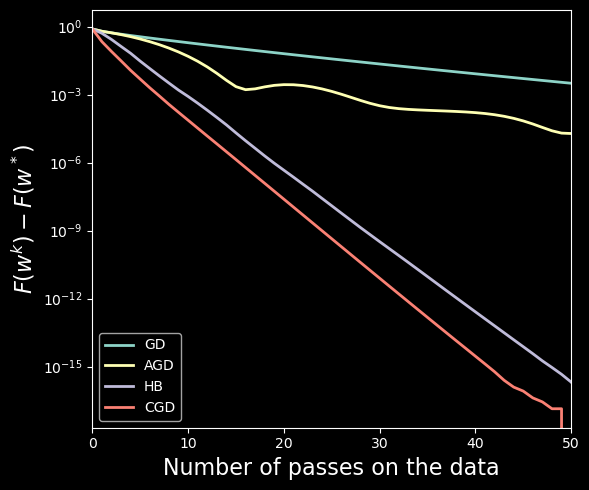

In [ ]:
callbacks = [callback_gd, callback_agd, callback_hb, callback_cgd]
names = ["GD", "AGD", "HB", "CGD"]
plt.figure(figsize=(6, 5))
plt.yscale("log")

for callback, name in zip(callbacks, names):
    objectives = np.array(callback.objectives)
    objectives_dist = objectives - obj_min    
    plt.plot(objectives_dist, label=name, lw=2)

plt.tight_layout()
plt.xlim((0, n_iter))
plt.xlabel("Number of passes on the data", fontsize=16)
plt.ylabel(r"$F(w^k) - F(w^*)$", fontsize=16)
plt.legend(loc='lower left')
plt.tight_layout()

   it    |   obj   
       0 | 8.94e-01
      10 | 5.87e-01
      20 | 4.81e-01
      30 | 4.42e-01
      40 | 4.28e-01
      50 | 4.22e-01
   it    |   obj   
       0 | 8.94e-01
      10 | 5.87e-01
      20 | 4.81e-01
      30 | 4.42e-01
      40 | 4.28e-01
      50 | 4.22e-01
   it    |   obj   
       0 | 8.94e-01
      10 | 1.74e+20
      20 | 8.63e+45
      30 | 7.76e+71
      40 | 6.97e+97
      50 | 6.25e+123
